In [1]:
import pandas as pd

In [4]:
health_data = pd.read_csv(r'C:\Users\raopo\Downloads\healthmonitoring.csv')
health_data.head()

,PatientID,Age,Gender,HeartRate,BloodPressure,RespiratoryRate,BodyTemperature,ActivityLevel,OxygenSaturation,SleepQuality,StressLevel,Timestamp
0,1,69,Male,60.993428,130/85,15,98.885236,resting,95.0,excellent,low,2024-04-26 17:28:55.286711
1,2,32,Male,98.723471,120/80,23,98.281883,walking,97.0,good,high,2024-04-26 17:23:55.286722
2,3,78,Female,82.295377,130/85,13,98.820286,resting,98.0,fair,high,2024-04-26 17:18:55.286726
3,4,38,Female,80.000000,111/78,19,98.412594,running,98.0,poor,moderate,2024-04-26 17:13:55.286728
4,5,41,Male,87.531693,120/80,14,99.369871,resting,98.0,good,low,2024-04-26 17:08:55.286731


In [5]:
health_data.isnull().sum()

PatientID             0
Age                   0
Gender                0
HeartRate             0
BloodPressure         0
RespiratoryRate       0
BodyTemperature      18
ActivityLevel         0
OxygenSaturation    163
SleepQuality          0
StressLevel           0
Timestamp             0
dtype: int64

In [6]:
body_temp_median = health_data['BodyTemperature'].median()
oxyg_median = health_data['OxygenSaturation'].median()

health_data['BodyTemperature'].fillna(body_temp_median, inplace = True)
health_data['OxygenSaturation'].fillna(oxyg_median, inplace = True)

In [7]:
health_data.describe()

,PatientID,Age,HeartRate,RespiratoryRate,BodyTemperature,OxygenSaturation
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,51.146000,80.131613,17.524000,98.584383,96.296000
std,144.481833,19.821566,9.606273,3.382352,0.461502,1.408671
min,1.000000,18.000000,60.169259,12.000000,97.094895,94.000000
25%,125.750000,34.000000,75.000000,15.000000,98.281793,96.000000
50%,250.500000,51.000000,80.000000,17.500000,98.609167,96.000000
75%,375.250000,69.000000,86.276413,20.000000,98.930497,97.000000
max,500.000000,84.000000,99.925508,23.000000,99.489150,99.000000


In [27]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PatientID         500 non-null    int64  
 1   Age               500 non-null    int64  
 2   Gender            500 non-null    object 
 3   HeartRate         500 non-null    float64
 4   BloodPressure     500 non-null    object 
 5   RespiratoryRate   500 non-null    int64  
 6   BodyTemperature   500 non-null    float64
 7   ActivityLevel     500 non-null    object 
 8   OxygenSaturation  500 non-null    float64
 9   SleepQuality      500 non-null    object 
 10  StressLevel       500 non-null    object 
 11  Timestamp         500 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 47.0+ KB


### plotting distributions of numerical features

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

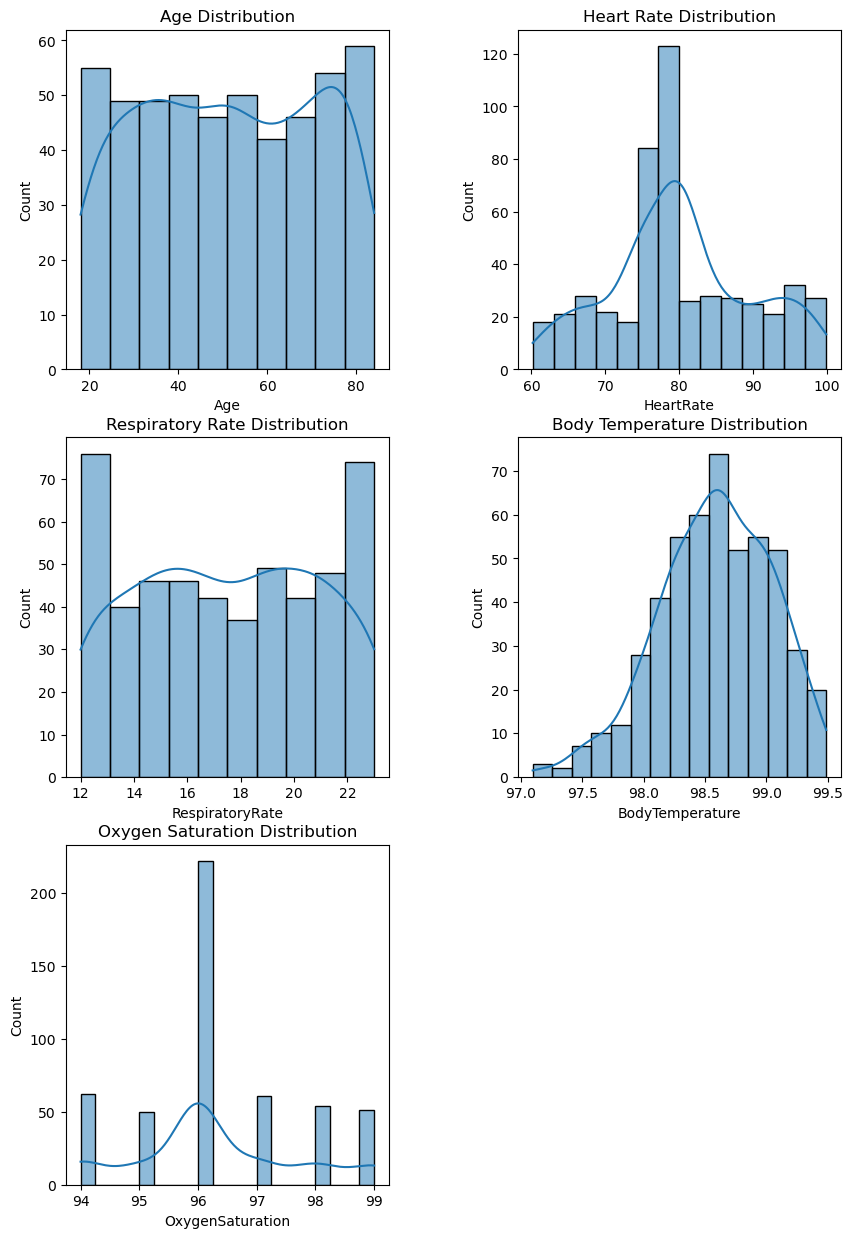

In [84]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

plt.subplot(3, 2, 1)
sns.histplot(health_data['Age'], kde = True)
plt.title('Age Distribution')

plt.subplot(3, 2, 2)
sns.histplot(health_data['HeartRate'], kde = True)
plt.title('Heart Rate Distribution')

plt.subplot(3, 2, 3)
sns.histplot(health_data['RespiratoryRate'], kde = True)
plt.title('Respiratory Rate Distribution')

plt.subplot(3, 2, 4)
sns.histplot(health_data['BodyTemperature'], kde = True)
plt.title('Body Temperature Distribution')

plt.subplot(3, 2, 5)
sns.histplot(health_data['OxygenSaturation'], kde = True)
plt.title('Oxygen Saturation Distribution')

fig.delaxes(axes[2,1])  # remove unused subplot
plt.subplots_adjust(wspace = 0.4)
plt.show()

### Now, lets look at the Gender distribution in the data and the correlation between the numerical columns in the dataset

In [86]:
gender_dist = health_data['Gender'].value_counts()
gender_dist

Gender
Male      256
Female    244
Name: count, dtype: int64

In [88]:
correlation_matrix = health_data[['Age', 'HeartRate', 'RespiratoryRate', 'BodyTemperature', 'OxygenSaturation']].corr()
correlation_matrix

,Age,HeartRate,RespiratoryRate,BodyTemperature,OxygenSaturation
Age,1.000000,-0.055109,0.011530,-0.014600,-0.099088
HeartRate,-0.055109,1.000000,0.079749,0.006981,0.019462
RespiratoryRate,0.011530,0.079749,1.000000,0.057665,0.036360
BodyTemperature,-0.014600,0.006981,0.057665,1.000000,-0.001025
OxygenSaturation,-0.099088,0.019462,0.036360,-0.001025,1.000000


#### plotting the findings

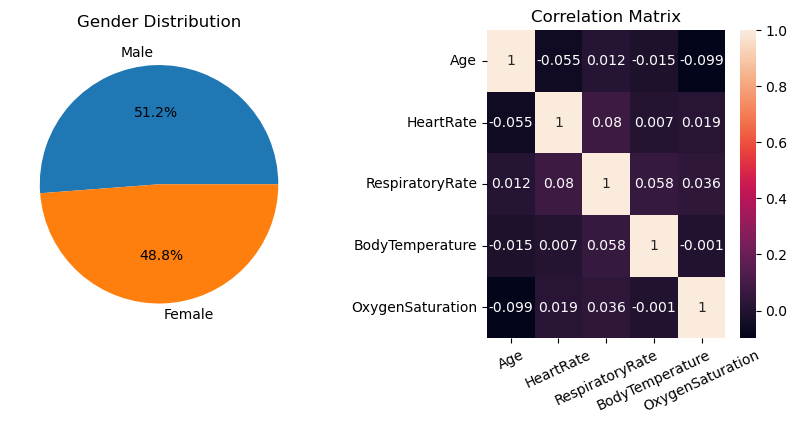

In [117]:
fig, axes = plt.subplots(1, 2, figsize = (10, 4))
label = health_data['Gender'].unique()

plt.subplot(1, 2, 1)
plt.pie(gender_dist, autopct='%1.1f%%', labels = label)
plt.title('Gender Distribution')

plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix')
plt.xticks(rotation = 25)

plt.subplots_adjust(wspace = 0.6)
plt.show()

#### The pie chart indicates a nearly even split between male and female in the dataset. The correlation matrix shows no strong correlations between the variables, as all the values are close to zero.

### Now, let’s have a look at the heart rate by activity level

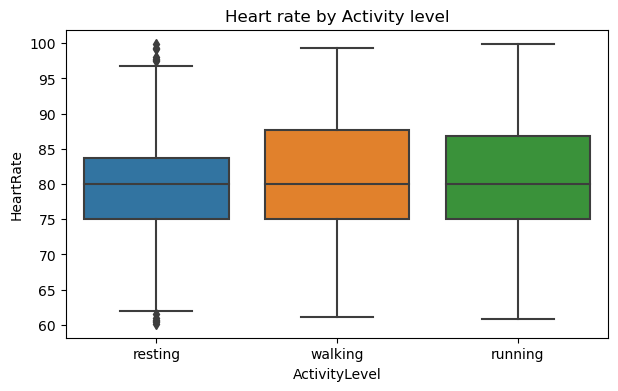

In [123]:
plt.figure(figsize = (7, 4))
sns.boxplot(x = 'ActivityLevel', y = 'HeartRate', data = health_data)
plt.title('Heart rate by Activity level')
plt.show()

### Let’s have a look at the distribution of blood pressure levels and some health metrics by gender

In [133]:
health_data[['SystolicBP', 'DiastolicBP']] = health_data['BloodPressure'].str.split('/', expand = True).astype(int)
health_data[['SystolicBP', 'DiastolicBP']]

,SystolicBP,DiastolicBP
0,130,85
1,120,80
2,130,85
3,111,78
4,120,80
...,...,...
495,135,76
496,130,85
497,120,80
498,130,85


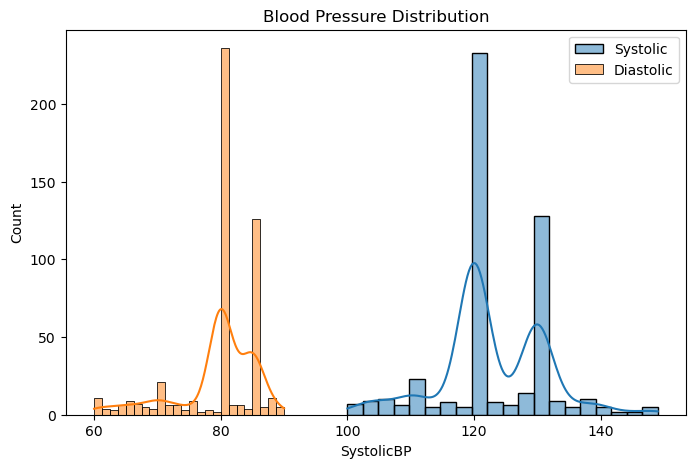

In [142]:
plt.subplots(figsize = (8, 5))
sns.histplot(health_data['SystolicBP'], label = 'Systolic', kde = True)
sns.histplot(health_data['DiastolicBP'], label = 'Diastolic', kde = True)
plt.title('Blood Pressure Distribution')
plt.legend()
plt.show()

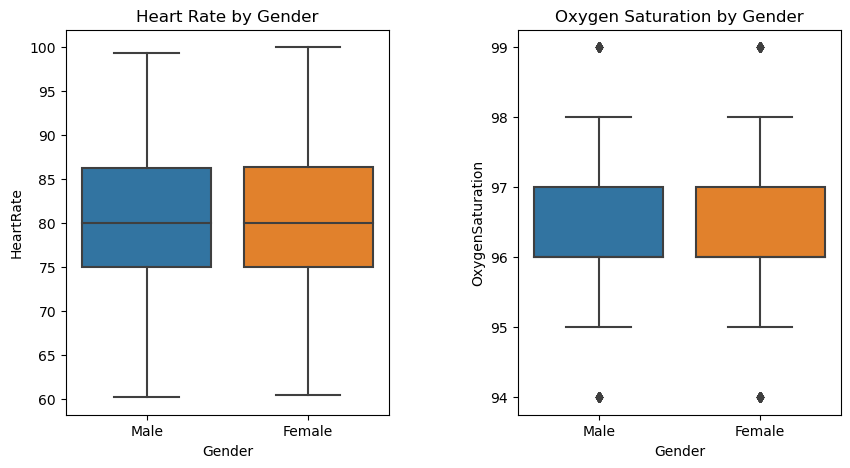

In [148]:
fig, axes  = plt.subplots(1, 2, figsize = (10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data = health_data, x = 'Gender', y = 'HeartRate')
plt.title('Heart Rate by Gender')

plt.subplot(1, 2, 2)
sns.boxplot(data = health_data, x = 'Gender', y = 'OxygenSaturation')
plt.title('Oxygen Saturation by Gender')

plt.subplots_adjust(wspace = 0.4)
plt.show()

### Let’s analyze heart rate and oxygen saturation by sleep quality and stress levels

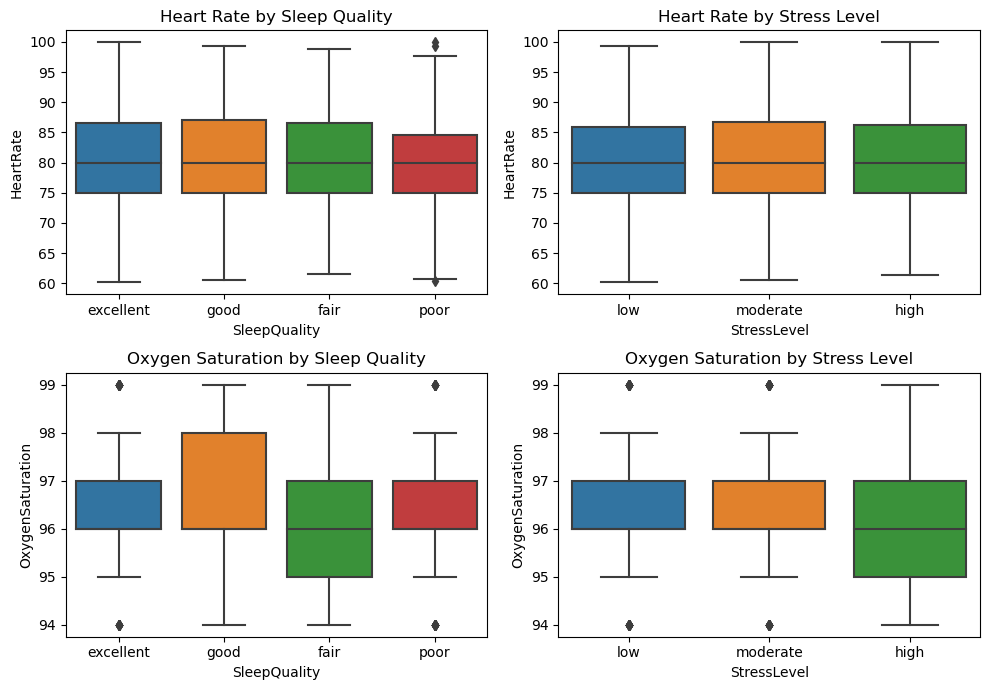

In [173]:
stress_level_order = ['low', 'moderate', 'high']
sleep_qua_level_order = ['excellent', 'good', 'fair', 'poor']

fig, axes = plt.subplots(2, 2, figsize=(10, 7))

plt.subplot(2, 2, 1)
sns.boxplot(x='SleepQuality', y='HeartRate', data=health_data, order=sleep_qua_level_order)
plt.title('Heart Rate by Sleep Quality')

plt.subplot(2, 2, 2)
sns.boxplot(x='StressLevel', y='HeartRate', data=health_data, order=stress_level_order)
plt.title('Heart Rate by Stress Level')

plt.subplot(2, 2, 3)
sns.boxplot(x='SleepQuality', y='OxygenSaturation', data=health_data, order=sleep_qua_level_order)
plt.title('Oxygen Saturation by Sleep Quality')

plt.subplot(2, 2, 4)
sns.boxplot(x='StressLevel', y='OxygenSaturation', data=health_data, order=stress_level_order)
plt.title('Oxygen Saturation by Stress Level')

plt.subplots_adjust(hspace = 0.6, wspace = 0.6)
plt.tight_layout()
plt.show()

### Let’s analyze the respiratory rate and body temperature by activity levels

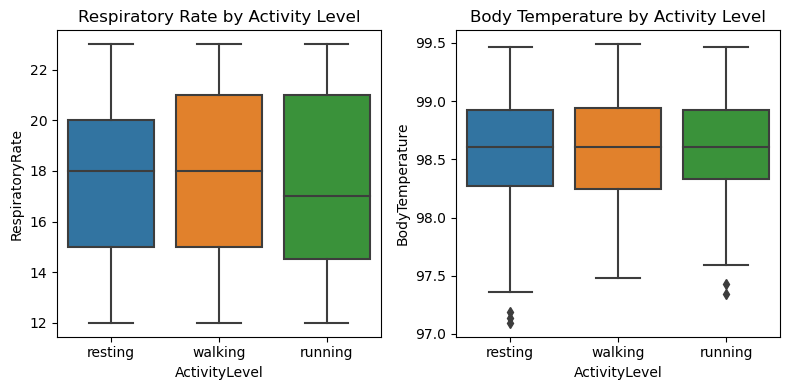

In [188]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.boxplot(x='ActivityLevel', y='RespiratoryRate', data=health_data)
plt.title('Respiratory Rate by Activity Level')

plt.subplot(1, 2, 2)
sns.boxplot(x='ActivityLevel', y='BodyTemperature', data=health_data)
plt.title('Body Temperature by Activity Level')

plt.subplots_adjust(wspace=0.6)
plt.tight_layout()
plt.show()

#### Grouping Patients:

The data is not so complicated enough that we need to use a clustering algorithm to group patients. So, let’s group patients based on:

1. Age Group: Young, Middle-aged, Senior

2. Blood Pressure Category: Normal, Elevated, Hypertension Stage 1, Hypertension Stage 2

3. Heart Rate Category: Low, Normal, High

4. Oxygen Saturation Category: Normal, Low

In [190]:
def age_group(age):
    if age <= 35:
        return 'Young'
    elif age <= 55:
        return 'Middle-aged'
    else:
        return 'Senior'


def bp_category(systolic, diastolic):
    if systolic < 120 and diastolic < 80:
        return 'Normal'
    elif 120 <= systolic < 140 or 80 <= diastolic < 90:
        return 'Elevated'
    elif 140 <= systolic < 160 or 90 <= diastolic < 100:
        return 'Hypertension Stage 1'
    else:
        return 'Hypertension Stage 2'
    
    
def hr_category(hr):
    if hr < 60:
        return 'Low'
    elif hr <= 100:
        return 'Normal'
    else:
        return 'High'
    
    
def oxy_category(oxy):
    if oxy < 94:
        return 'Low'
    else:
        return 'Normal'

In [195]:
health_data['AgeGroup'] = health_data['Age'].apply(age_group)
health_data['BPCategory'] = health_data.apply(lambda x: bp_category(x['SystolicBP'], x['DiastolicBP']), axis=1)
health_data['HRCategory'] = health_data['HeartRate'].apply(hr_category)
health_data['OxyCategory'] = health_data['OxygenSaturation'].apply(oxy_category)

In [199]:
health_data[['Age', 'AgeGroup', 'SystolicBP', 'DiastolicBP', 'BPCategory', 'HeartRate', 'HRCategory', 'OxygenSaturation', 'OxyCategory']].head()

,Age,AgeGroup,SystolicBP,DiastolicBP,BPCategory,HeartRate,HRCategory,OxygenSaturation,OxyCategory
0,69,Senior,130,85,Elevated,60.993428,Normal,95.0,Normal
1,32,Young,120,80,Elevated,98.723471,Normal,97.0,Normal
2,78,Senior,130,85,Elevated,82.295377,Normal,98.0,Normal
3,38,Middle-aged,111,78,Normal,80.000000,Normal,98.0,Normal
4,41,Middle-aged,120,80,Elevated,87.531693,Normal,98.0,Normal


#### let’s visualize the groups

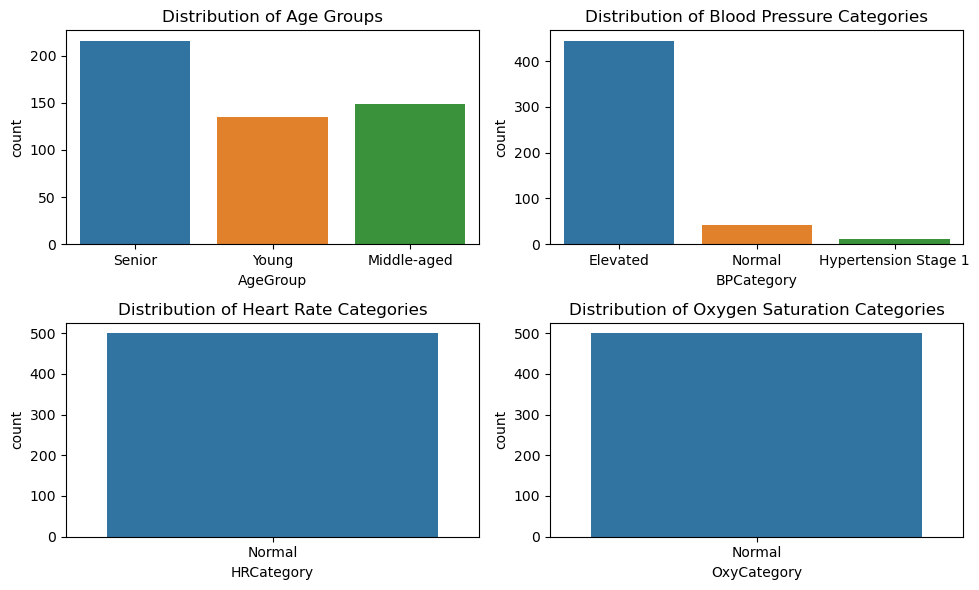

In [204]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

plt.subplot(2, 2, 1)
sns.countplot(x='AgeGroup', data=health_data)
plt.title('Distribution of Age Groups')

plt.subplot(2, 2, 2)
sns.countplot(x='BPCategory', data=health_data)
plt.title('Distribution of Blood Pressure Categories')

plt.subplot(2, 2, 3)
sns.countplot(x='HRCategory', data=health_data)
plt.title('Distribution of Heart Rate Categories')

plt.subplot(2, 2, 4)
sns.countplot(x='OxyCategory', data=health_data)
plt.title('Distribution of Oxygen Saturation Categories')

plt.tight_layout()
plt.show()

#### Observation:

1. Distribution of Age Groups: 

The count plot shows that the ‘Senior’ category has the highest count, followed by the ‘Young’ and ‘Middle-aged’ categories. It suggests that seniors are the largest age group in this dataset.

2. Distribution of Blood Pressure Categories: 

The majority of the dataset falls under ‘Normal’ blood pressure, with fewer instances in the ‘Elevated’ and ‘Hypertension Stage 1’. ‘Hypertension Stage 2’ has the lowest count, indicating that severe hypertension is less common among the participants.

3. Distribution of Heart Rate Categories: 

Most individuals have a ‘Normal’ heart rate, with very few falling into the ‘Low’ or ‘High’ categories. It indicates that most individuals in this dataset have a heart rate that falls within the expected range.

4. Distribution of Oxygen Saturation Categories: 

Almost everyone has ‘Normal’ oxygen saturation levels, with very few instances of ‘Low’ saturation. It suggests that oxygen deprivation is not a common issue in this group.